# **CocaCola**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from sklearn.model_selection import train_test_split



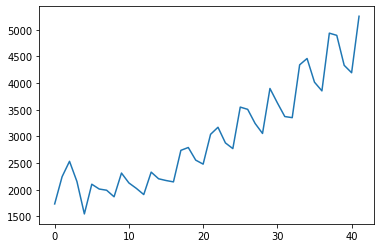

In [50]:
coke = pd.read_csv("/content/CocaCola Sales.csv")
coke.Sales.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


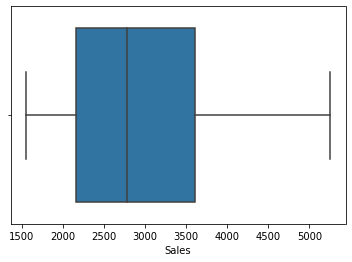

In [51]:
sns.boxplot("Sales",data=coke)


In [52]:
coke.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [53]:
coke.columns


Index(['Quarter', 'Sales'], dtype='object')

In [54]:
pd.get_dummies(coke)

,Sales,Quarter_Q1_86,Quarter_Q1_87,Quarter_Q1_88,Quarter_Q1_89,Quarter_Q1_90,Quarter_Q1_91,Quarter_Q1_92,Quarter_Q1_93,Quarter_Q1_94,Quarter_Q1_95,Quarter_Q1_96,Quarter_Q2_86,Quarter_Q2_87,Quarter_Q2_88,Quarter_Q2_89,Quarter_Q2_90,Quarter_Q2_91,Quarter_Q2_92,Quarter_Q2_93,Quarter_Q2_94,Quarter_Q2_95,Quarter_Q2_96,Quarter_Q3_86,Quarter_Q3_87,Quarter_Q3_88,Quarter_Q3_89,Quarter_Q3_90,Quarter_Q3_91,Quarter_Q3_92,Quarter_Q3_93,Quarter_Q3_94,Quarter_Q3_95,Quarter_Q4_86,Quarter_Q4_87,Quarter_Q4_88,Quarter_Q4_89,Quarter_Q4_90,Quarter_Q4_91,Quarter_Q4_92,Quarter_Q4_93,Quarter_Q4_94,Quarter_Q4_95
0,1734.827000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2104.411995,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2014.362999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1991.746998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,1869.049999,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2313.631996,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


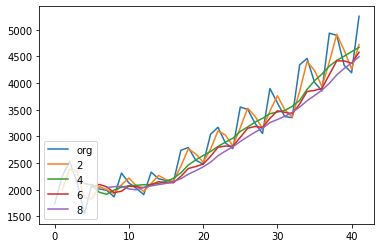

In [55]:
coke.Sales.plot(label="org")
for i in range(2,10,2):
    coke["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

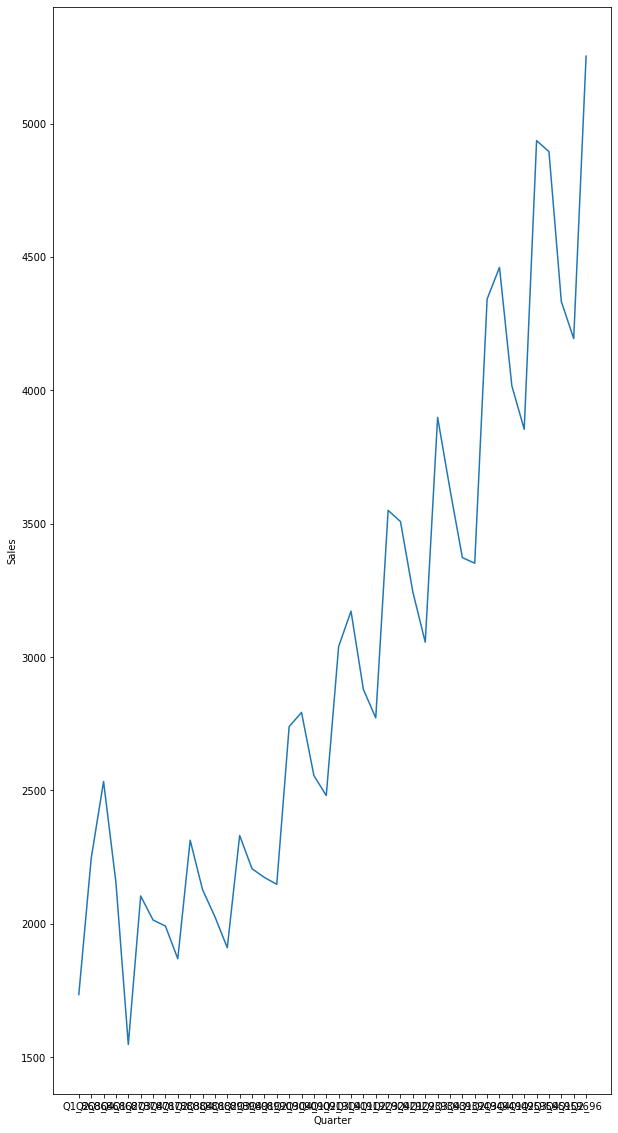

In [56]:
plt.figure(figsize=(10,20))
sns.lineplot(x="Quarter",y="Sales",data=coke)

In [57]:
Train = coke.head(147)
Test = coke.tail(12)

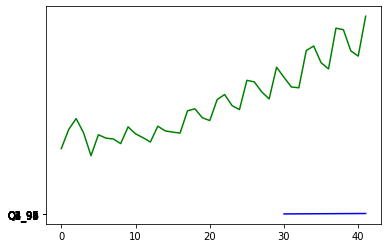

In [58]:
plt.plot(Train.index, Train["Sales"], label='Train',color="green")
plt.plot(Test.index, Test["Quarter"], label='Test',color="blue")

In [59]:
import statsmodels.formula.api as smf 
linear_model = smf.ols('Sales~Quarter',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['Quarter'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

2.108576721979194e-12

In [60]:
Exp = smf.ols('Sales~Quarter',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['Quarter'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


inf

In [61]:
Quad = smf.ols('Sales~Quarter',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["Quarter"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

2.108576721979194e-12

In [ ]:
add_sea = smf.ols('Sales~Quarter',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Quarter']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

2.108576721979194e-12

In [ ]:
add_sea_Quad = smf.ols('Sales~Quarter',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Quarter']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

2.108576721979194e-12

In [ ]:
Mul_sea = smf.ols('Sales~Quarter',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


inf

In [ ]:
Mul_Add_sea = smf.ols('Sales~Quarter',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


inf

In [ ]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,rmse_linear,2.108577e-12
2,rmse_Quad,2.108577e-12
3,rmse_add_sea,2.108577e-12
4,rmse_add_sea_quad,2.108577e-12
1,rmse_Exp,inf
5,rmse_Mult_sea,inf
6,rmse_Mult_add_sea,inf


In [29]:
def rmse(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [30]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[1])
rmse(pred_ses,Test.Sales) 


4.445361984202588

In [ ]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[1])
rmse(pred_hw,Test.Sales)

14.562039656345767

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[1])
rmse(pred_hwe_add_add,Test.Sales)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


0.5500331654234374

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[1])
rmse(pred_hwe_mul_add,Test.Sales) 


2.2874193480185987

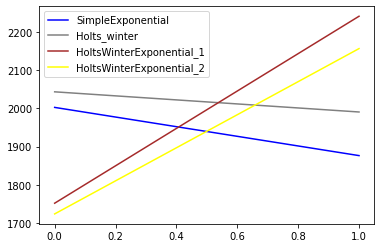

In [ ]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="blue")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="grey")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')


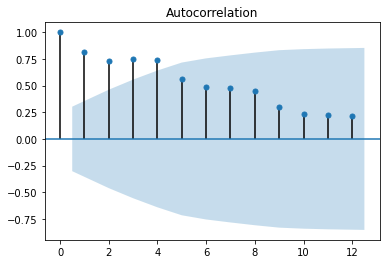

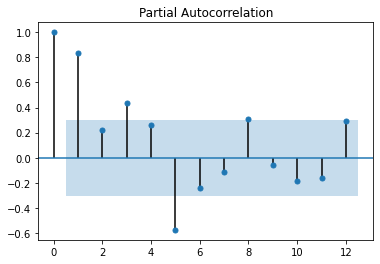

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coke.Sales,lags=12)
tsa_plots.plot_pacf(coke.Sales,lags=12)
plt.show()

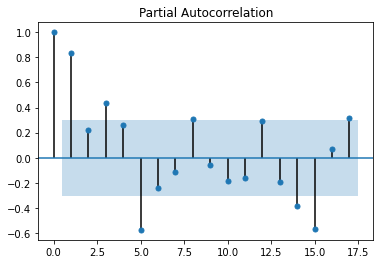

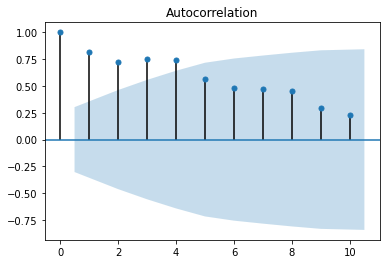

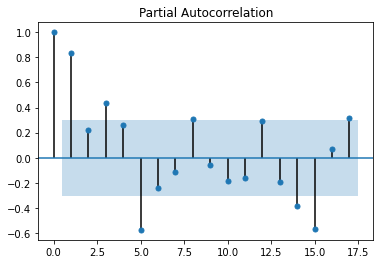

In [ ]:
tsa_plots.plot_acf(coke.Sales,lags=10)
tsa_plots.plot_pacf(coke.Sales)

# **Airlines**

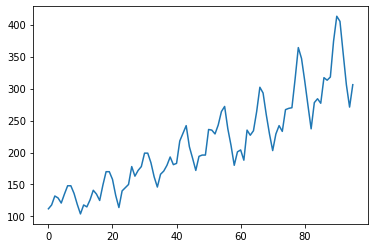

In [24]:
air = pd.read_csv("/content/Airlines.csv")
air.Passengers.plot()

In [25]:
air.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [26]:
air.columns


Index(['Month', 'Passengers'], dtype='object')

In [27]:
pd.get_dummies(air)

,Passengers,Month_Apr-00,Month_Apr-01,Month_Apr-02,Month_Apr-95,Month_Apr-96,Month_Apr-97,Month_Apr-98,Month_Apr-99,Month_Aug-00,Month_Aug-01,Month_Aug-02,Month_Aug-95,Month_Aug-96,Month_Aug-97,Month_Aug-98,Month_Aug-99,Month_Dec-00,Month_Dec-01,Month_Dec-02,Month_Dec-95,Month_Dec-96,Month_Dec-97,Month_Dec-98,Month_Dec-99,Month_Feb-00,Month_Feb-01,Month_Feb-02,Month_Feb-95,Month_Feb-96,Month_Feb-97,Month_Feb-98,Month_Feb-99,Month_Jan-00,Month_Jan-01,Month_Jan-02,Month_Jan-95,Month_Jan-96,Month_Jan-97,Month_Jan-98,...,Month_Mar-00,Month_Mar-01,Month_Mar-02,Month_Mar-95,Month_Mar-96,Month_Mar-97,Month_Mar-98,Month_Mar-99,Month_May-00,Month_May-01,Month_May-02,Month_May-95,Month_May-96,Month_May-97,Month_May-98,Month_May-99,Month_Nov-00,Month_Nov-01,Month_Nov-02,Month_Nov-95,Month_Nov-96,Month_Nov-97,Month_Nov-98,Month_Nov-99,Month_Oct-00,Month_Oct-01,Month_Oct-02,Month_Oct-95,Month_Oct-96,Month_Oct-97,Month_Oct-98,Month_Oct-99,Month_Sep-00,Month_Sep-01,Month_Sep-02,Month_Sep-95,Month_Sep-96,Month_Sep-97,Month_Sep-98,Month_Sep-99
0,112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,129,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
93,306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
94,271,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
air["Date"] = pd.to_datetime(air.Month,format="%b-%y")
air["month"] = air.Date.dt.strftime("%b")
air["year"] = air.Date.dt.strftime("%Y")


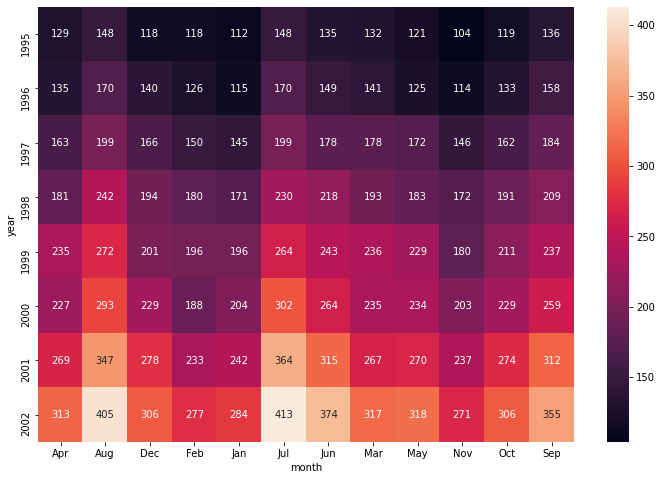

In [ ]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=air,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")


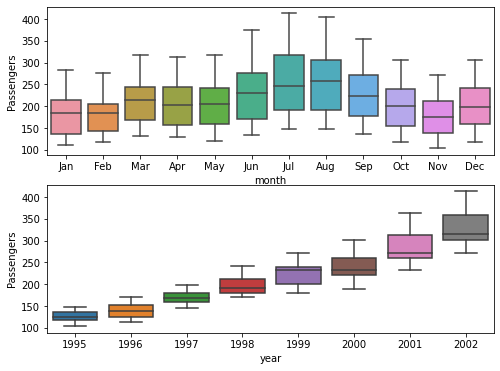

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=air)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=air)


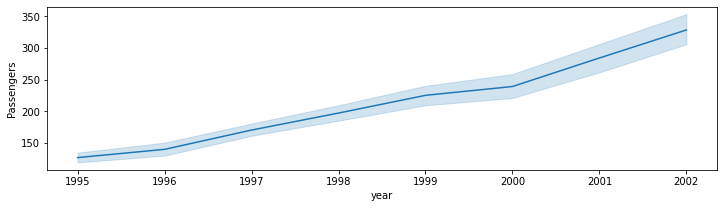

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=air)

In [32]:
Train = air.head(147)
Test = air.tail(12)

In [35]:
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~Month',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['Month'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

1.4859236464188184e-13

In [36]:
Exp = smf.ols('Passengers~Month',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['Month'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


inf

In [39]:
Quad = smf.ols('Passengers~Month',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[['Month']]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

1.4859236464188184e-13

In [40]:
add_sea = smf.ols('Passengers~Month',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Month']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

1.4859236464188184e-13

In [41]:
add_sea_Quad = smf.ols('Passengers~Month',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Month']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

1.4859236464188184e-13

In [42]:
Mul_sea = smf.ols('Passengers~Month',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


inf

In [43]:
Mul_Add_sea = smf.ols('Passengers~Month',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


inf

In [44]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,rmse_linear,1.485924e-13
2,rmse_Quad,1.485924e-13
3,rmse_add_sea,1.485924e-13
4,rmse_add_sea_quad,1.485924e-13
1,rmse_Exp,inf
5,rmse_Mult_sea,inf
6,rmse_Mult_add_sea,inf


In [45]:
air = air.assign(Passengers_Linear_Interpolation = air['Passengers'].interpolate(method='linear'))
air.head()

,Month,Passengers,Date,month,year,Passengers_Linear_Interpolation
0,Jan-95,112,1995-01-01,Jan,1995,112
1,Feb-95,118,1995-02-01,Feb,1995,118
2,Mar-95,132,1995-03-01,Mar,1995,132
3,Apr-95,129,1995-04-01,Apr,1995,129
4,May-95,121,1995-05-01,May,1995,121


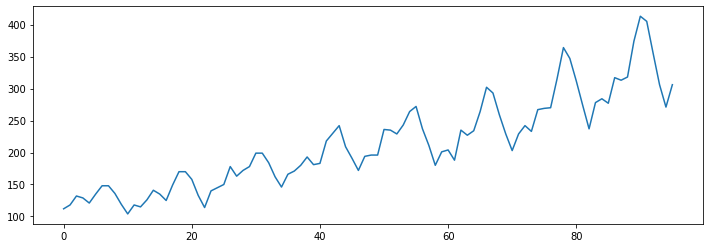

In [46]:
air['Passengers_Linear_Interpolation'].plot(figsize=(12,4))

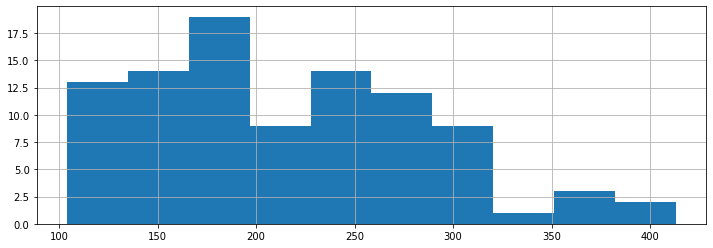

In [ ]:
air['Passengers'].hist(figsize=(12,4))


In [ ]:
air.head()

,Month,Passengers,Date,month,year,Passengers_Linear_Interpolation
0,Jan-95,112,1995-01-01,Jan,1995,112
1,Feb-95,118,1995-02-01,Feb,1995,118
2,Mar-95,132,1995-03-01,Mar,1995,132
3,Apr-95,129,1995-04-01,Apr,1995,129
4,May-95,121,1995-05-01,May,1995,121


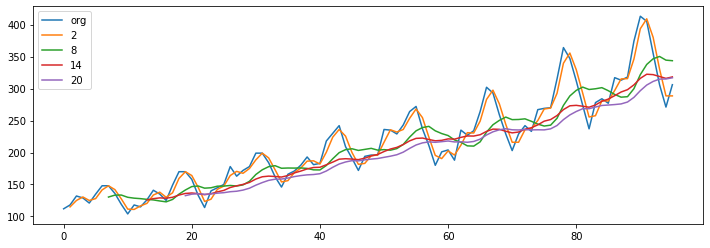

In [47]:
plt.figure(figsize=(12,4))
air.Passengers.plot(label="org")
for i in range(2,24,6):
    air["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

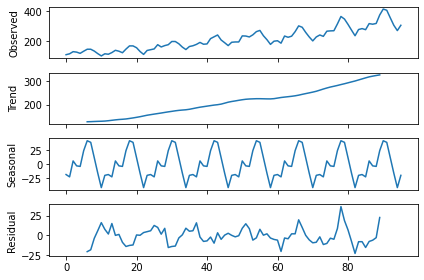

In [ ]:
decompose_ts_add = seasonal_decompose(air.Passengers,freq=12)
decompose_ts_add.plot()
plt.show()

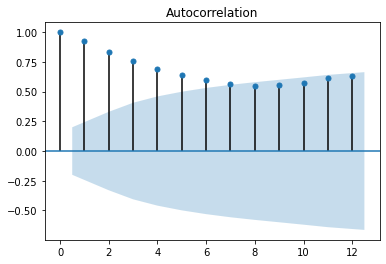

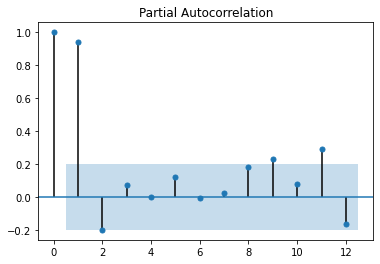

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(air.Passengers,lags=12)
tsa_plots.plot_pacf(air.Passengers,lags=12)
plt.show()

In [ ]:
def rmse(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[1])
rmse(pred_ses,Test.Passengers) 

1.3151357973396238

In [ ]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[1])
rmse(pred_hw,Test.Passengers)

3.6682346760003948

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[1])
rmse(pred_hwe_add_add,Test.Passengers) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


0.511547087631024

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[1])
rmse(pred_hwe_mul_add,Test.Passengers) 


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


4.314229855637974

In [ ]:
hwe_model_add_add = ExponentialSmoothing(air["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [ ]:
hwe_model_add_add.forecast(10)

96     312.897034
97     308.167827
98     355.528080
99     345.763587
100    345.688515
101    392.461275
102    436.489817
103    429.847617
104    380.161381
105    332.306168
dtype: float64

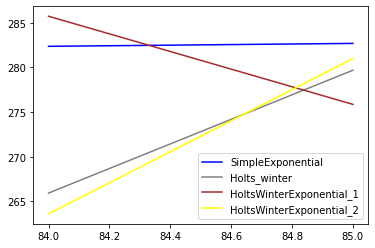

In [ ]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="blue")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="grey")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')
